In [1]:
from prose import finderchart

callisto.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
io.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
ganymede.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
europa.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
artemis.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
trappist-south.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
trappist-north.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
saint-ex.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
liverpool.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)
spirit.telescope differs from builtins (use prose.CONFIG.update_builtins() to update)


ImportError: cannot import name 'finderchart' from 'prose' (/Users/lgrcia/code/prose/prose/__init__.py)

In [34]:
coordinates = "20 45 38.0", "+30 42 30"
fov = (30, 30)

im1 = finderchart.sdss_image(coordinates, fov, filter="poss1_blue")
im2 = finderchart.sdss_image(coordinates, fov, filter="poss2ukstu_red")

INFO Querying https://archive.stsci.edu/cgi-bin/dss_form
INFO telescope Palomar Schmidt not found - using default
INFO Querying https://archive.stsci.edu/cgi-bin/dss_form
INFO telescope Oschin Schmidt - D not found - using default


In [45]:
from skimage.transform import rotate, AffineTransform

In [48]:
T = AffineTransform(scale=2, rotation=90)

In [40]:
im2.data = rotate(im2.data, 120)

In [41]:
from prose import blocks, Sequence

detetction_s = Sequence([blocks.SegmentedPeaks(n_stars=300, unit_euler=True)])
detetction_s.run([im1, im2])

RUN 100%|█████████████████████████████████████| 2/2 [00:00<00:00,  7.18images/s]


In [42]:
from twirl.utils import *
from twirl.utils import _find_transform

quads1, stars1 = quads_stars(im1.stars_coords, n=20)
quads2, stars2 = quads_stars(im2.stars_coords, n=20)

In [43]:
tolerance = 5

# KDTree
kdt = KDTree(quads1)
dist, indices = kdt.query(quads2)

# We pick the two asterisms leading to the highest stars matching
closeness = []
for i, m in enumerate(indices):
    M = _find_transform(stars1[m], stars2[i])
    new_s1 = affine_transform(M)(im1.stars_coords)
    closeness.append(count_cross_match(im2.stars_coords, new_s1, tolerance=tolerance))

i = np.argmax(closeness)

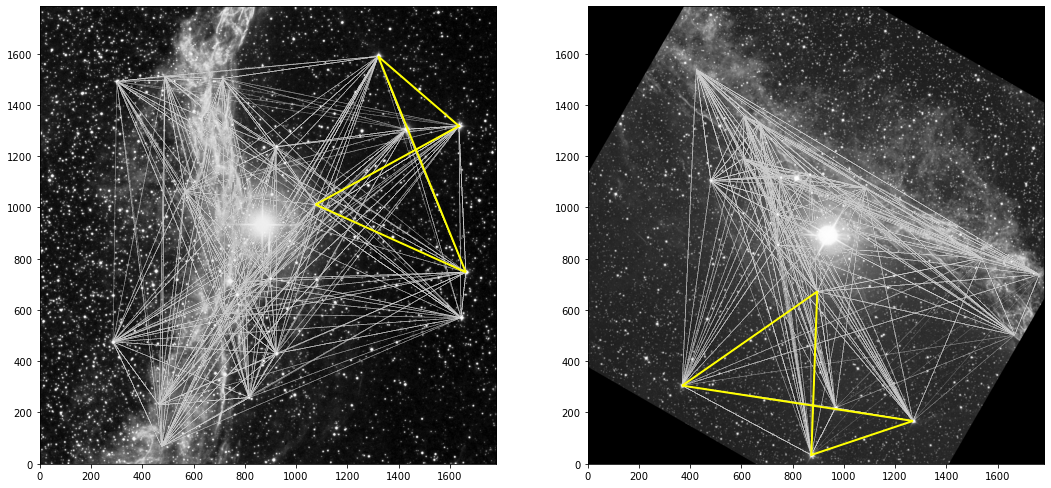

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
ax1 = plt.subplot(121)
im1.show(ax=ax1, stars=False, vmin=False, scale=0.1)
for s in stars1:
    ax1.add_patch(plt.Polygon(s, fill=False, ec="w", alpha=0.02))

ax1.add_patch(plt.Polygon(stars1[indices[i]], fill=False, ec="yellow", alpha=1, lw=2))

ax = plt.subplot(122)
im2.show(ax=ax, stars=False, vmin=False, scale=0.1)
for s in stars2:
    ax.add_patch(plt.Polygon(s, fill=False, ec="w", alpha=0.02))
    
ax.add_patch(plt.Polygon(stars2[i], fill=False, ec="yellow", alpha=1, lw=2))